{'BM_do_with_exception': {'ratios': [2048.0, 1024.0, 512.0, 256.0, 128.0, 64.0, 16.0, 8.0, 4.0, 2.0], 'median': [159.084, 157.985, 169.308, 167.583, 166.109, 119.033, 163.759, 235.22, 368.893, 656.086]}, 'BM_do_with_optional': {'ratios': [2048.0, 1024.0, 512.0, 256.0, 128.0, 64.0, 16.0, 8.0, 4.0, 2.0], 'median': [102.092, 108.298, 105.24, 113.495, 106.108, 103.478, 101.383, 95.0978, 84.6567, 58.7305]}, 'BM_do_with_ref': {'ratios': [2048.0, 1024.0, 512.0, 256.0, 128.0, 64.0, 16.0, 8.0, 4.0, 2.0], 'median': [102.366, 104.008, 103.366, 104.995, 109.422, 114.022, 104.048, 105.423, 86.9454, 62.8843]}, 'BM_do_with_tuple': {'ratios': [2048.0, 1024.0, 512.0, 256.0, 128.0, 64.0, 16.0, 8.0, 4.0, 2.0], 'median': [111.153, 105.538, 109.629, 109.49, 108.007, 111.861, 105.711, 97.9107, 90.8446, 57.4079]}, 'BM_do_with_expected': {'ratios': [2048.0, 1024.0, 512.0, 256.0, 128.0, 64.0, 16.0, 8.0, 4.0, 2.0], 'median': [110.711, 108.086, 107.43, 113.948, 107.181, 111.728, 105.175, 103.732, 94.1792, 68.201

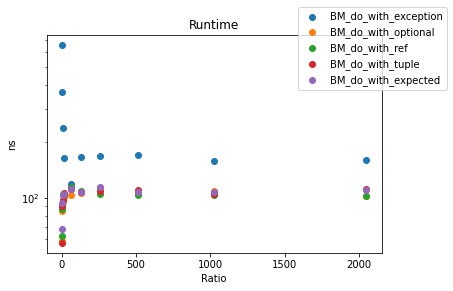

In [4]:
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
# create empty lists
median = []
ratio = []
labels = []

data = {}

filename = "./data_optimized_disabled_rvo.csv"

with open(filename) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:        
        if row[0].endswith("_median"): # only use median values
            testcase = row[0].split("/")[0] # split argument for unique testcase names
            if not testcase in data:
                data[testcase] = { "ratios" : [], "median" : []}
            data[testcase]["median"].append(float(row[2]))
            data[testcase]["ratios"].append(float(row[11]))

plt.title("Runtime")
plt.xlabel("Ratio")
plt.ylabel("ns")
plt.yscale("log")

print(data)
print(labels)
print(ratio)
colors = cm.rainbow(np.linspace(0, 1, len(data)))

for k, v in data.items():
    plt.scatter(v["ratios"], v["median"], label=k)

plt.legend(loc=(0.75, 0.75))